In [73]:
class A:
    def __init__(self, x):
        self.x = x
    def __add__(self, v):
        if type(v) == A:
            r = A(0) #クラスの中でそのクラスのオブジェクトを生成
            r.x = self.x + v.x
            return r
        else:
            r = A(0)
            r.x = self.x + v
            return r #ｒという変数名はここで消滅。中身がけり地として引き継がれる。
    def __sub__(self, t):
        r = A(0)
        r.x = self.x - t.x
        return r
    def get(self):
        return self.x
    def __str__(self):
        return 'x(' + str(self.x) +')'
    def __mul__(self,s):
        r = A(0)
        r.x = self.x*s
        return 

a = A(1)
b = A(2)
c = a.__add__(b)
c1 = a - b
c2 = a + 3
print(c, c1, c2.get())

x(3) x(-1) 4


In [1]:


class A:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def __add__(self,v):
        if type(v) == A:
            r = A(0,0)
            r.x = v.x + self.x
            r.y = v.y + self.y
            return r
        elif type(v)==list:
            r = A(0,0)
            su = sum(v)
            r.x = su + self.x
            r.y  = su + self.y
            return r
        else:
            r = A(0,0)
            r.x = v + self.x
            r.y = v + self.y
    def __str__(self):
        return 'A(' + str(self.x) + ',' +  str(self.y) + ')'

a = A(1, 2)
c = a + a
c2 = a + [2, 3, 4, 5, 6, 7, 8, 9]
print(c, c2) # A(2, 0) A(45, 46)

A(2,4) A(45,46)


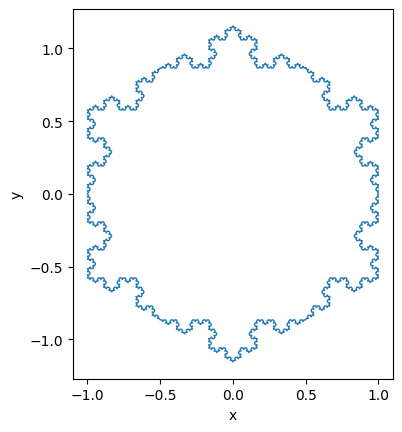

In [9]:
#課題　コッホ曲線


import matplotlib.pyplot as plt # 描画ライブラリ
import math
pi = 3.14159265357989
class R2:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __add__(self, v):
        r = R2(0, 0)
        r.x = self.x + v.x
        r.y = self.y + v.y
        return r
    def __sub__(self, v):
        r = R2(0, 0)
        r.x = self.x - v.x
        r.y = self.y - v.y
        return r
    def __mul__(self, v):
        r = R2(0, 0)
        r.x = self.x * v
        r.y = self.y * v
        return r
    def get(self):
        t = (self.x, self.y)
        return t
    
class Rotate:
    def __init__(self, theta):
        self.c = math.cos(theta)
        self.s = math.sin(theta)
    def __mul__(self, v):
        r = R2(0,0)
        r.x, r.y = v.x*self.c - v.y*self.s, v.x*self.s + v.y*self.c
        
        return r

## ここから，「ここまで」と書いてある場所まで改変しない
r = R2(1, 0)
rM = Rotate(pi/3)
rM2 = Rotate(-pi/3)
lr = []
for i in range(6):
    r = rM * r
    lr.append(r)

# コッホ曲線を描いてみせよう

def Sophisticate(alr):
    rlr = []
    for i in range(len(alr)):
        i1 = i
        i2 = (i + 1)%len(alr)
        r1 = alr[i1]
        r5 = alr[i2]
        dr = (r5 - r1) * (1/3)
        r2 = r1 + dr 
        r3 = r2 + rM2 * dr 
        r4 = r3 + rM * dr
        rlr = rlr + [r1, r2, r3, r4]
    return rlr

for k in range(4):
    lr = Sophisticate(lr)
# convert to lx, ly
lx, ly = [], []
for r in lr:
    x, y = r.get()
    lx.append(x)
    ly.append(y)
    
lx.append(lx[0])
ly.append(ly[0])

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(lx, ly, linewidth=1.0) # 凡例を付けて描画    
ax.set_aspect(1)# axis("equal") # アスペクト比を1に設定
ax.set_xlabel("x")
ax.set_ylabel("y")
## ここまで

plt.show() # 画面へ描画
# plt.savefig("koch-curve.svg")
plt.close()

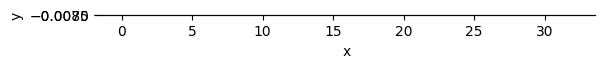

In [9]:
#自由課題
import math
import matplotlib.pyplot as plt

#演算定義
class vec:
    def __init__(self,x,y):
        self.x = x
        self.y = y
        self.g = 9.8
    def __add__(self,v):
        r = vec(0,0)
        r.x = self.x + v.x
        r.y = self.y + v.y
        return r
    def __mul__(self,v):
        r = vec(0,0)
        r.x = self.x*v
        r.y = self.y*v
        return r

#計算
r0 = vec(0,1)
v0 = vec(0.1,0)
g = vec(0,-1)
dt = 2**(-7)
e = 0.86
def cul(r,v):
    rn = r + v*dt
    vn = v + g*dt
    if v.y < 0:
        r.x = rn.x
        r.y = - rn.y
        v.x = vn.x
        v.y = -e*v.y
    else:
        r = rn
        v = vn
    return v.y

#描画のためのリスト
t = 0
lx = []
ly = []
while t <32:
    s = cul(r0,v0)
    lx.append(t)
    ly.append(s)
    t += dt
    

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(lx, ly, linewidth=1.0) # 凡例を付けて描画    
ax.set_aspect(1)# axis("equal") # アスペクト比を1に設定
ax.set_xlabel("x")
ax.set_ylabel("y")
## ここまで

plt.show() # 画面へ描画
# plt.savefig("koch-curve.svg")
plt.close()